# 03-Decision trees and random forests

## 1. Business Understanding

<b> Phishing Websites dataset </b>  <br>
Conduct an automated system that warns users when they are about to visit a phishing website

## 2. Data Understanding

<b> Phishing Websites dataset (UCI) </b>  <br>
- Features: information about websites
- Target:  `result` (1/-1) <br>
(1=phishing 0=Legimate)

In [554]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import export_text


phishing_websites = fetch_ucirepo(id=327) 
  
df = phishing_websites.data.original
df.head(5)


,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


## 3. Data Preparation

Splitting the dataset into two datasets:
 - <b>X </b> contains all columns except `result`.
 - <b>y </b> contains only the `result` column.

In [555]:
### Decision tree
X = df.drop(columns=['result'])
y = df['result']

### Random forest
Xr = df.drop(columns={'result'})
yr = df['result']

## 4. Modeling

### Decision Tree

In [556]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(7738, 30) (3317, 30) (7738,) (3317,)


In [557]:
for i in range(1, 6):
    model = DecisionTreeClassifier(max_depth=i, ccp_alpha=0.012)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusionmatrix = confusion_matrix(y_test, y_pred)
    print(f"Max depth: {i}, Accuracy: {accuracy:.4f}, Confusion Matrix:\n{confusionmatrix}\n")

Max depth: 1, Accuracy: 0.8863, Confusion Matrix:
[[1269  217]
 [ 160 1671]]

Max depth: 2, Accuracy: 0.9050, Confusion Matrix:
[[1340  146]
 [ 169 1662]]

Max depth: 3, Accuracy: 0.9050, Confusion Matrix:
[[1340  146]
 [ 169 1662]]

Max depth: 4, Accuracy: 0.9050, Confusion Matrix:
[[1340  146]
 [ 169 1662]]

Max depth: 5, Accuracy: 0.9050, Confusion Matrix:
[[1340  146]
 [ 169 1662]]



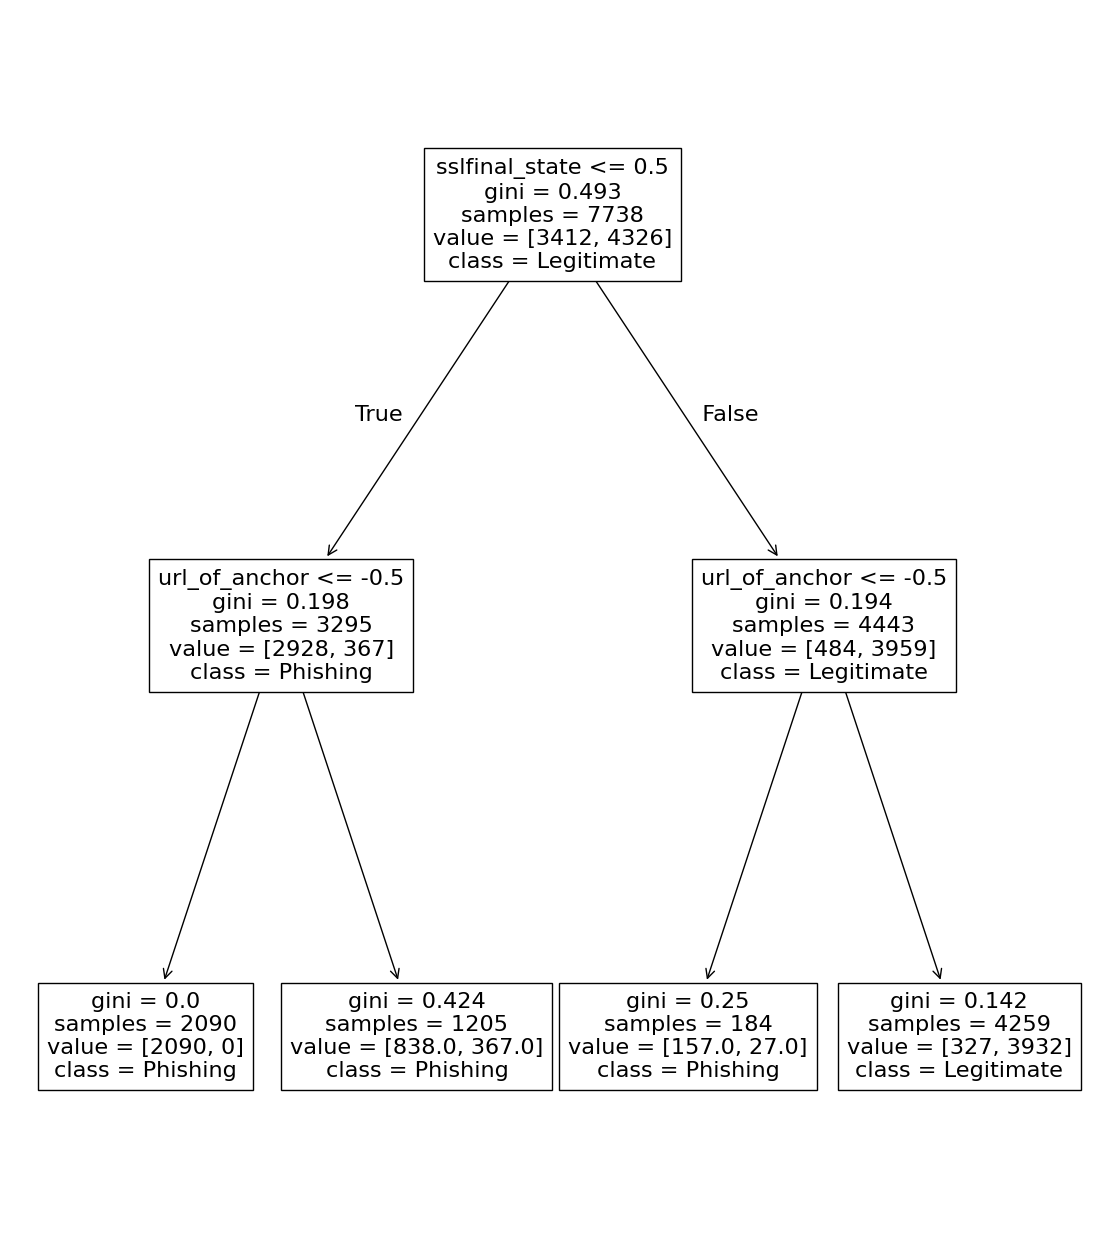

In [558]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
fig = plt.figure(figsize = (14, 16))
plot_tree(model, feature_names = X.keys(), class_names = ['Phishing', 'Legitimate'])
plt.show()

In [559]:
preds = model.predict(X_test)
accuracy1 = accuracy_score(y_test, preds)
confusion_matrix1 = confusion_matrix(y_test, preds)
classification_report1 = classification_report(y_test, preds)

### Random forest

In [560]:
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size = 0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7738, 30) (3317, 30) (7738,) (3317,)


In [561]:
model = RandomForestClassifier(n_estimators=50, max_depth=4, bootstrap=True, max_samples=0.7, max_features=0.75)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",0.75
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_tru

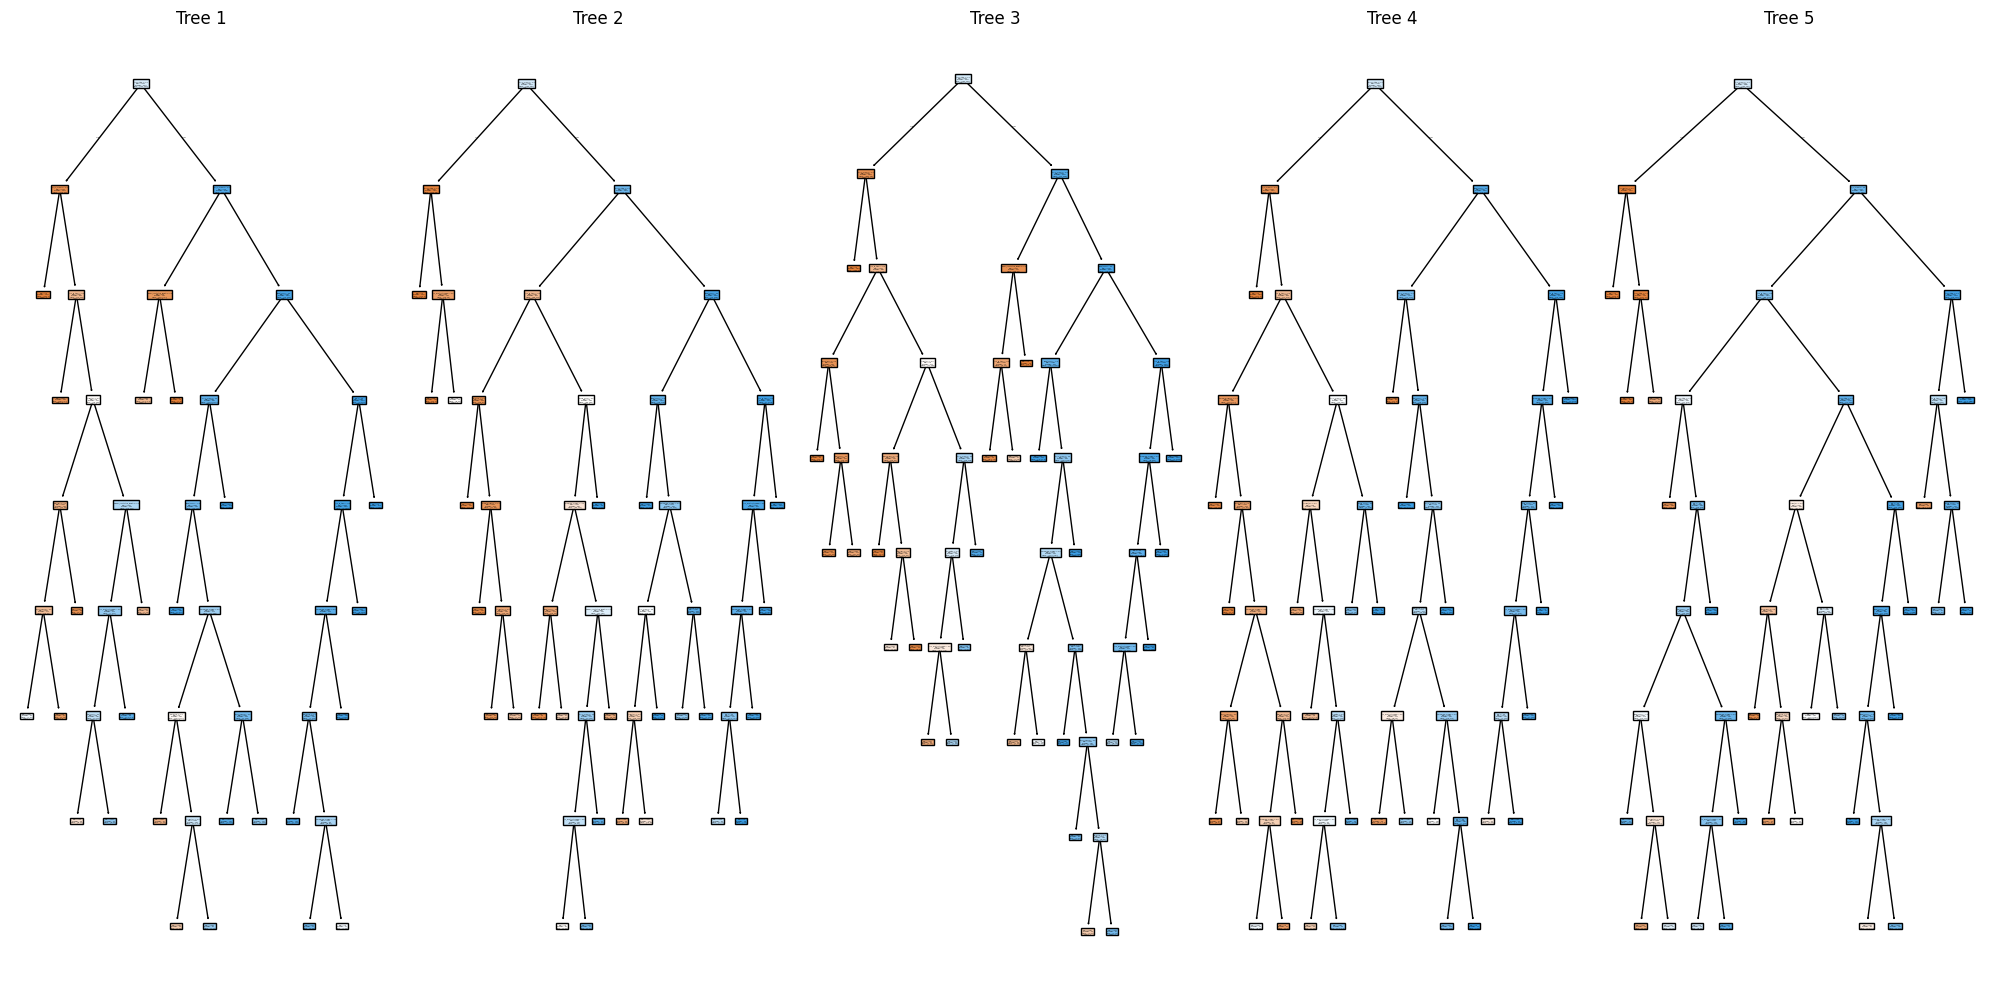

In [562]:
model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=20, max_samples=0.7, min_samples_leaf=30, min_samples_split=10, max_features=0.75, ccp_alpha=0.0005)
model.fit(X, y)

n_trees_to_plot = 5
plt.figure(figsize=(20, 10))

for i in range(n_trees_to_plot):
    plt.subplot(1, n_trees_to_plot, i + 1)
    plot_tree(model.estimators_[i], filled=True,
              feature_names= X.keys(), class_names=['-1', '1'])
    plt.title(f'Tree {i + 1}')

plt.tight_layout()
plt.show()

In [563]:
tree_text = export_text(model.estimators_[0], feature_names=X.keys().tolist())
with open('03_tree.txt', 'w') as f:
    f.write(tree_text)

In [564]:

y_pred = model.predict(X_test)
confusion_matrix2 = confusion_matrix(y_test, y_pred)
classification_report2 = classification_report(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred)

## 5. Evaluation

### Decision tree
<br>
Max depth = 2

In [565]:
print("Accuracy:", accuracy1)
print("Confusion Matrix:\n", confusion_matrix1)
print("Classification Report:\n", classification_report1)

Accuracy: 0.9050346698824239
Confusion Matrix:
 [[1340  146]
 [ 169 1662]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.89      0.90      0.89      1486
           1       0.92      0.91      0.91      1831

    accuracy                           0.91      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.91      0.91      0.91      3317



### Random forest
<br>
n values = 100
max depth = 20
max samples = 0.7
min samples leaf = 30
min samples split = 10
max features = 0.75
ccp alpha = 0.0005

In [566]:
print("Confusion Matrix:\n", confusion_matrix2)
print("Classification Report:\n", classification_report2)
print("Accuracy:", accuracy2)

Confusion Matrix:
 [[1350  105]
 [  76 1786]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.93      0.94      1455
           1       0.94      0.96      0.95      1862

    accuracy                           0.95      3317
   macro avg       0.95      0.94      0.94      3317
weighted avg       0.95      0.95      0.95      3317

Accuracy: 0.9454326198372023


## 6. Final Verdic

Instructions to mannually make the decision of whether the website is likely to be a phishing site or not:

1. Check the sslfinal_state if its below or equal to 0.5 it is phishing site
2. Check the url_of_anchor if its below or equal to -0.5 its **phishing site**. If its not then the site is **legimate**